In [1]:
#Some import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

Load the Data set

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Online Retail.xlsx")

Exploratory Data Analysis (EDA)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [10]:
df['StockCode'].unique()

array(['85123A', 71053, '84406B', ..., '90214U', '47591b', 23843],
      dtype=object)

In [11]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [12]:
df['InvoiceDate'].unique()

array(['2010-12-01T08:26:00.000000000', '2010-12-01T08:28:00.000000000',
       '2010-12-01T08:34:00.000000000', ...,
       '2011-12-09T12:31:00.000000000', '2011-12-09T12:49:00.000000000',
       '2011-12-09T12:50:00.000000000'], dtype='datetime64[ns]')

In [13]:
def monthly(x):
    return dt.datetime(x.year, x.month, 1)

In [14]:
df['BillMonth'] = df['InvoiceDate'].apply(monthly)

Line Chart

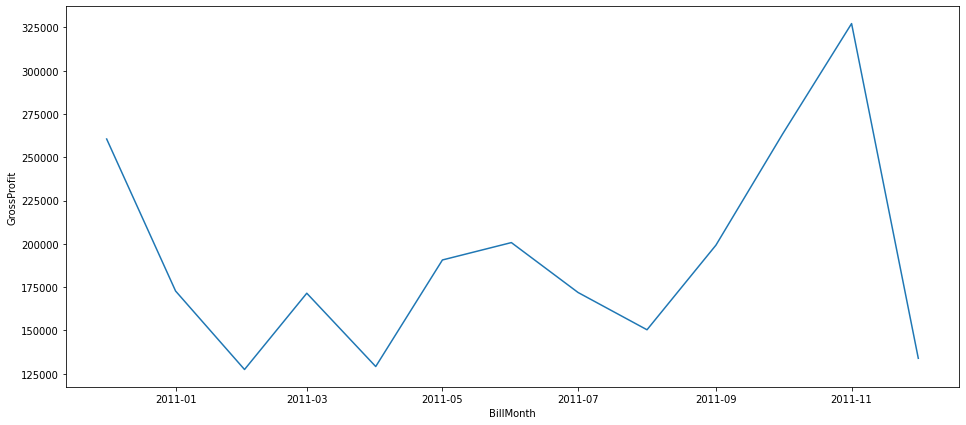

In [15]:
df_sum = df.groupby('BillMonth').sum().drop('CustomerID', axis = 1)
df_sum = df_sum.rename(columns={'UnitPrice' : 'GrossProfit'})
plt.figure(figsize=(16,7))
sns.lineplot(x = df_sum.index, y = df_sum['GrossProfit'])
plt.show()

The graph brings upward trends for particular times. 

Bar Chart

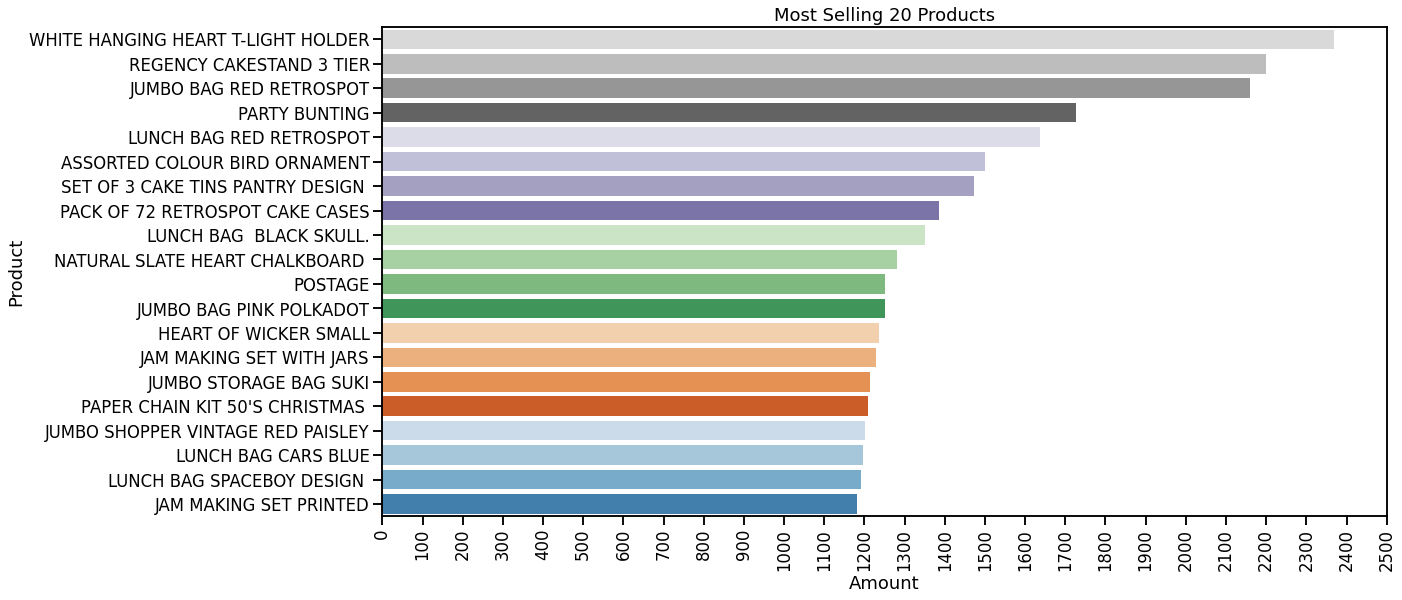

In [16]:
most_selling_products = df['Description'].value_counts()[:20]
plt.figure(figsize = (18,9))
sns.set_context("talk")
sns.barplot(x = most_selling_products.values, y = most_selling_products.index,palette = "tab20c_r")
plt.xticks(np.arange(0,2501,100),rotation = 90)
plt.xlabel("Amount")
plt.ylabel("Product")
plt.title("Most Selling 20 Products")
plt.show()

Above graph repersent the top 20 Products for Most Selling. Comparing for all products top 20 and after find the product "WHITE HANGING HEART T-LIGHT HOLDER" is the more sell to the Comparsion of other products.

Cohort Analysis with Python

In [17]:
g = df.groupby('CustomerID')['BillMonth']
df['CohortMonth'] = g.transform('min')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,BillMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [18]:
def get_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [19]:
billYear, billMonth = get_int(df, 'BillMonth')
cohortYear, cohortMonth = get_int(df, 'CohortMonth')

In [20]:
diffYear = billYear - cohortYear
diffMonth = billMonth - cohortMonth

In [21]:
#Calculated by end of months function
df['Month_Index'] = diffYear * 12 + diffMonth + 1

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,BillMonth,CohortMonth,Month_Index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


In [23]:
df['CohortMonth'] = df['CohortMonth'].apply(dt.datetime.date)

In [24]:
g = df.groupby(['CohortMonth', 'Month_Index'])

In [25]:
cohortData = g['CustomerID'].apply(pd.Series.nunique).reset_index()
cohortCounts = cohortData.pivot(index = 'CohortMonth', columns = 'Month_Index', values = 'CustomerID')
cohortSizes = cohortCounts.iloc[:, 0]
retention = cohortCounts.divide(cohortSizes, axis = 0) * 100

In [26]:
retention.round(2)

Month_Index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.19,33.44,38.71,35.97,39.66,37.97,35.44,35.44,39.45,37.34,50.00,27.43
2011-01-01,100.0,23.99,28.27,24.23,32.78,29.93,26.13,25.65,31.12,34.68,36.82,14.96,NaN
2011-02-01,100.0,24.74,19.21,27.89,26.84,24.74,25.53,28.16,25.79,31.32,9.21,NaN,NaN
2011-03-01,100.0,19.09,25.45,21.82,23.18,17.73,26.36,23.86,28.86,8.86,NaN,NaN,NaN
2011-04-01,100.0,22.74,22.07,21.07,20.74,23.75,23.08,26.09,8.36,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.66,17.20,17.20,21.51,24.37,26.52,10.39,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.85,18.72,27.23,24.68,33.62,10.21,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.94,20.42,23.04,27.23,11.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.15,25.15,25.15,13.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


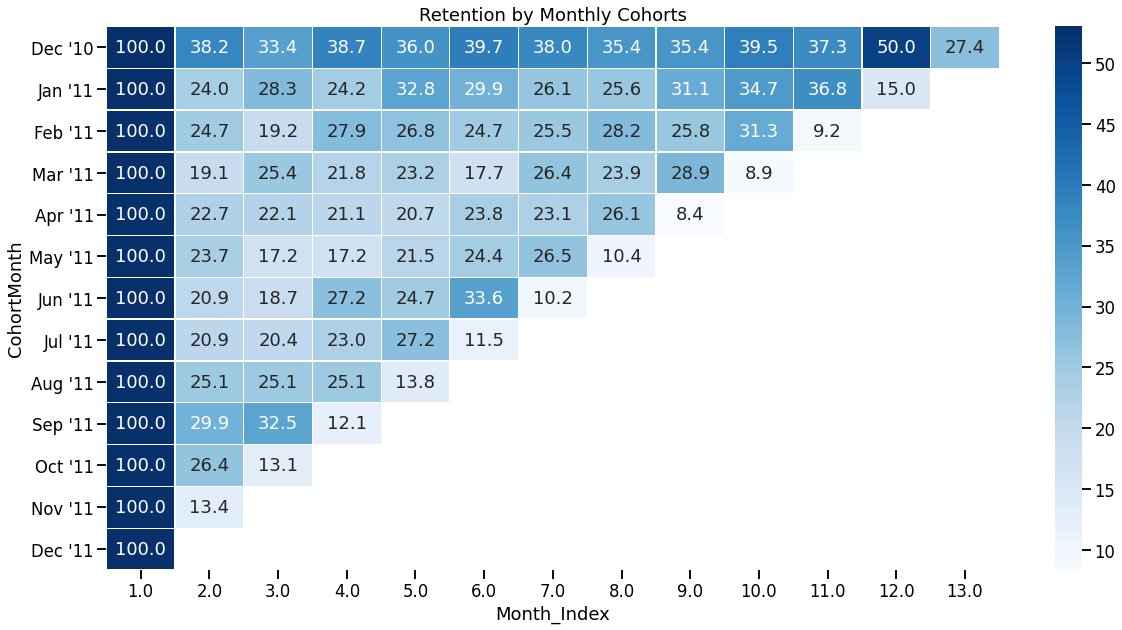

In [27]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11", "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", "Oct '11", "Nov '11", "Dec '11"]
plt.figure(figsize = (20,10))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(retention.round(2), annot = True, cmap = "Blues", vmax = list(retention.max().sort_values(ascending = False))[1]+3, fmt = '.1f', linewidth = 0.3, yticklabels=month_list)
plt.show()

To better visualize the trends in data, most cohort charts utilize color shading. When we take a look at the data again, but with color-coordinating cells, you will see that the darker the color, the higher the revenue per user is. The color difference between cells also makes it easy to see when value decays over time, so in this case, we can see that users spend more money in their first Month_Index than any other Month_index. You can also see anomalies within the data, like the low start during the CohortMonth corresponding May-11".

#RFM Analysis for Customer Segmentation

Calculate RFM values : 
Let's calculate recency, frequency and monetary values. Also we will assume that we want cluster our customers into 5 segments

In [28]:
# We assume that we are doing this analysis 1 day after from latest transaction on the data.
calculating_date = max(df.InvoiceDate)+dt.timedelta(days=1)

In [29]:
calculating_date

Timestamp('2011-12-10 12:50:00')

In [30]:
df['TotalSum'] = df['Quantity']*df['UnitPrice']

In [31]:
data = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x:(calculating_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})
data.rename(columns={'InvoiceDate':'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalSum': 'MonetaryValue'},inplace=True)
data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [32]:
recency_labels = range(5, 0, -1)
frequency_labels = range(1, 6)
recency_groups = pd.qcut(data['Recency'], q=5, labels=recency_labels)
frequency_groups = pd.qcut(data['Frequency'],q=5, labels=frequency_labels)
data = data.assign(R=recency_groups.values, F=frequency_groups.values)

In [33]:
monetary_labels = range(1,6)
monetary_groups = pd.qcut(data['MonetaryValue'],q=5,labels=monetary_labels)
data = data.assign(M=monetary_groups)
data['RFM_Score'] = data[['R','F','M']].sum(axis=1)
data['RFM_Score'].head()

CustomerID
12346.0     3
12347.0    15
12348.0     9
12349.0    12
12350.0     5
Name: RFM_Score, dtype: int64

In [34]:
def rfm_level(df):
    if df['RFM_Score'] >= 14:
        return 'Platinum Plus'
    elif ((df['RFM_Score'] >= 11) and (df['RFM_Score'] < 14)):
        return 'Platinum'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 11)):
        return 'Gold'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 8)):
        return 'Silver'
    else:
        return 'Bronze'
data['RFM_Level'] = data.apply(rfm_level, axis=1)
data.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,3,Bronze
12347.0,2,182,4310.00,5,5,5,15,Platinum Plus
12348.0,75,31,1797.24,2,3,4,9,Gold
12349.0,19,73,1757.55,4,4,4,12,Platinum
12350.0,310,17,334.40,1,2,2,5,Bronze


In [35]:
rfm_level_agg = data.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
rfm_level_agg

Recency Frequency MonetaryValue      
                 mean      mean          mean count
RFM_Level                                          
Bronze          218.2      11.7         187.4   905
Gold             71.3      48.7         857.2  1106
Platinum         33.0     113.8        1977.9   993
Platinum Plus     9.6     345.5        8037.9   612
Silver          115.7      23.7         395.7   756

#K-Means Clustering
Now we will try to cluster our customers with one of the most used clustering ML algorithm: K-Means! But before do that we have to know some details about K-Means. K-Means assumes your variables have symmetric distributions, they have same average values and same variance. So, we will prepare our data according to this assumptions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

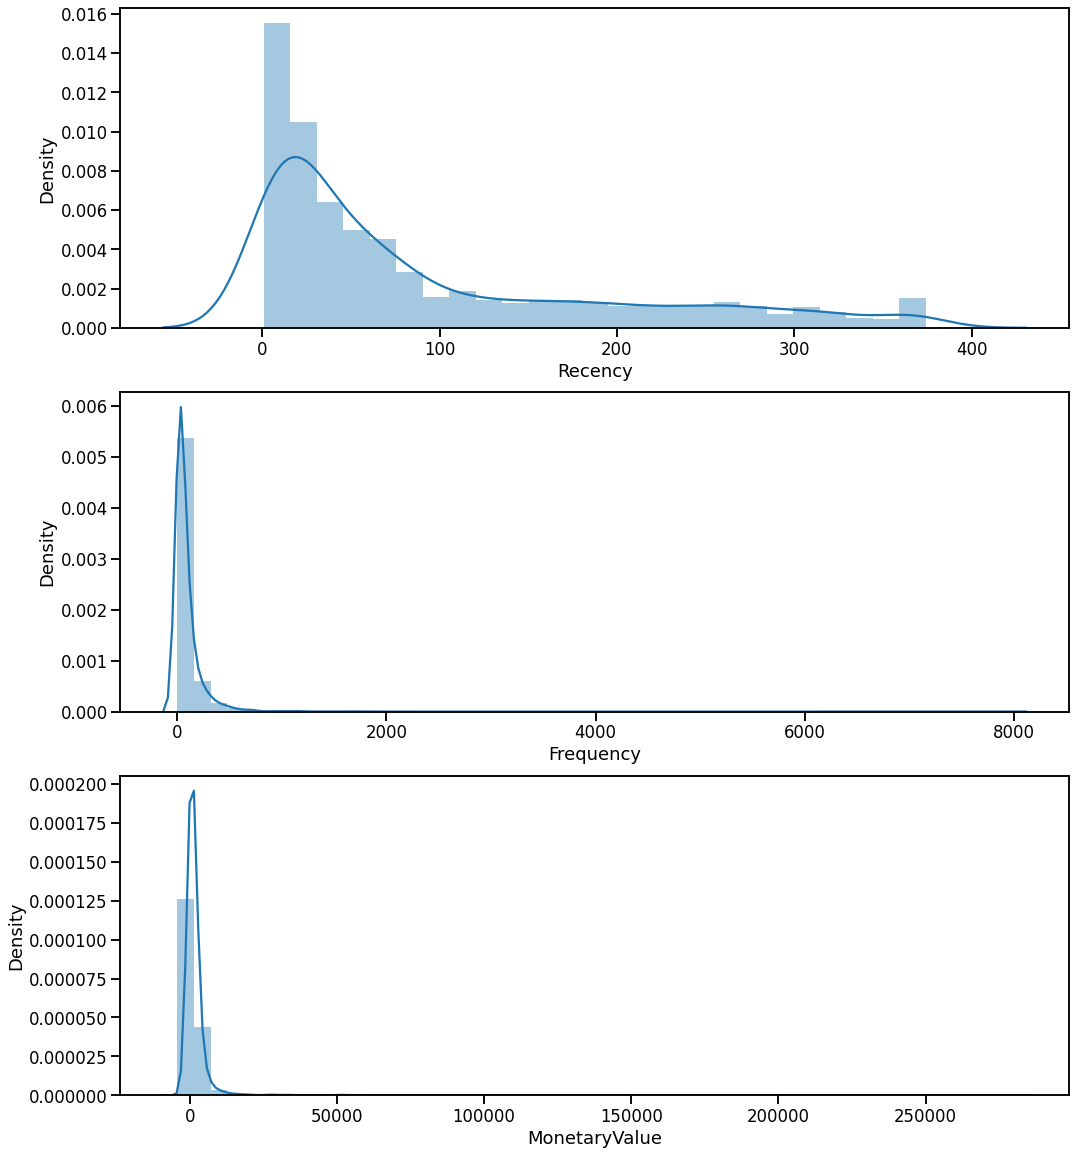

In [36]:
data_rfm = data[['Recency','Frequency','MonetaryValue']]
plt.figure(figsize=(17,20))
plt.subplot(3,1,1)
sns.distplot(data_rfm['Recency'])
plt.subplot(3,1,2)
sns.distplot(data_rfm['Frequency'])
plt.subplot(3,1,3)
sns.distplot(data_rfm['MonetaryValue'])

In [37]:
data_rfm.min()

Recency             1.00
Frequency           1.00
MonetaryValue   -4287.63
dtype: float64

Since we will apply log transformation we have to make all values positive

In [38]:
data_rfm_positive = data_rfm
data_rfm_positive.MonetaryValue = data_rfm.MonetaryValue + abs(data_rfm.MonetaryValue.min()) + 1

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:
data_rfm_positive.min()

Recency          1.0
Frequency        1.0
MonetaryValue    1.0
dtype: float64

#Standard Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
data_log = np.log(data_rfm)
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data=data_normalized,index=data_rfm.index, columns=data_rfm.columns)

In [41]:
data_normalized

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,1.402917,-2.230272,-0.694689
12347.0,-2.075135,1.133419,1.216783
12348.0,0.399593,-0.186462,0.267050
12349.0,-0.537936,0.452198,0.249071
12350.0,1.368554,-0.634452,-0.488376
...,...,...,...
18280.0,1.294161,-1.030135,-0.581345
18281.0,1.001152,-1.296103,-0.643388
18282.0,-1.128562,-0.834493,-0.583806


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

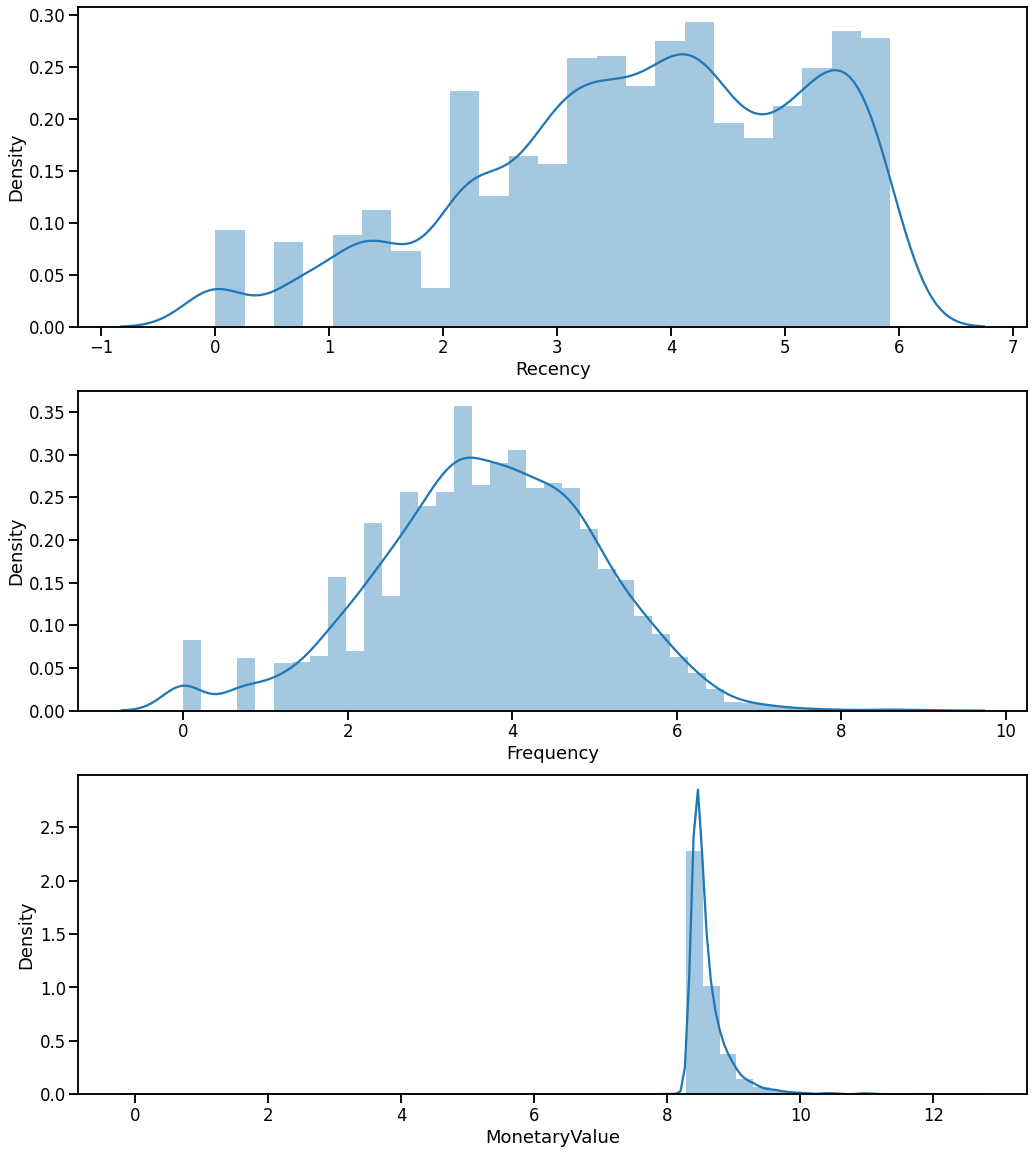

In [42]:
plt.figure(figsize=(17,20))
plt.subplot(3,1,1)
sns.distplot(data_log['Recency'])
plt.subplot(3,1,2)
sns.distplot(data_log['Frequency'])
plt.subplot(3,1,3)
sns.distplot(data_log['MonetaryValue'])

K-Means

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_

In [44]:
data_rfm_k5 = data_rfm.assign(Cluster=cluster_labels)
grouped = data_rfm_k5.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    "Frequency": "mean",
    "MonetaryValue": ['mean','count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          14.1      54.5        5111.6   927
1         182.0      11.3        4576.8  1230
2          16.7     256.3        8252.3   711
3           9.9     815.2       42459.2    77
4         107.2      68.3        5287.5  1427

To find which 'k' value is more suitable for our data we will use elbow method.

In [45]:
sse = {}
for k in range(1,21):
  kmeans = KMeans(n_clusters=k,random_state=0)
  kmeans.fit(data_normalized)
  sse[k] = kmeans.inertia_ #Sum of squared distances of samples to their closest cluster center.

Elbow Method

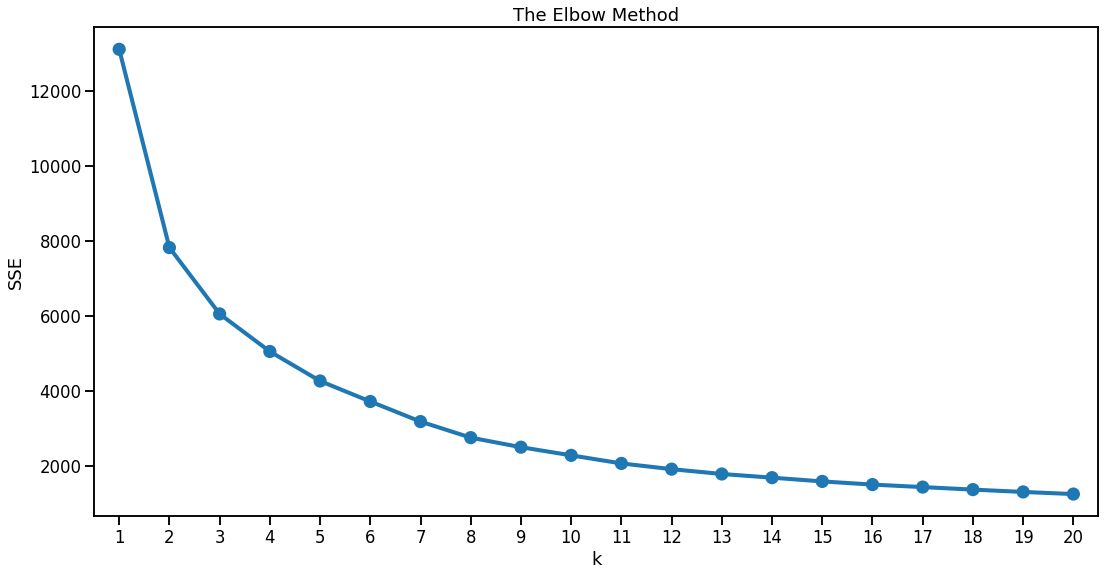

In [46]:
plt.figure(figsize=(18,9))
plt.title("The Elbow Method")
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show()

Above fig repersent the k=3 is the best of k value 

In [47]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
data_rfm_k3 = data_rfm.assign(Cluster=cluster_labels)
grouped = data_rfm_k3.groupby(['Cluster'])
grouped.agg({
    "Recency":'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          33.5      97.5        5643.3  1915
1         163.4      22.0        4716.7  2036
2          13.1     416.4       15771.3   421

In [48]:
data_melt = pd.melt(
    data_rfm_k3.reset_index(),
    id_vars = ['CustomerID','Cluster'],
    value_vars=['Recency','Frequency','MonetaryValue'],
    var_name='Metric',value_name='Value')

In [49]:
data_melt.head(10)

,CustomerID,Cluster,Metric,Value
0,12346.0,1,Recency,326.0
1,12347.0,2,Recency,2.0
2,12348.0,1,Recency,75.0
3,12349.0,0,Recency,19.0
4,12350.0,1,Recency,310.0
5,12352.0,0,Recency,36.0
6,12353.0,1,Recency,204.0
7,12354.0,1,Recency,232.0
8,12355.0,1,Recency,214.0
9,12356.0,0,Recency,23.0


Snake plot

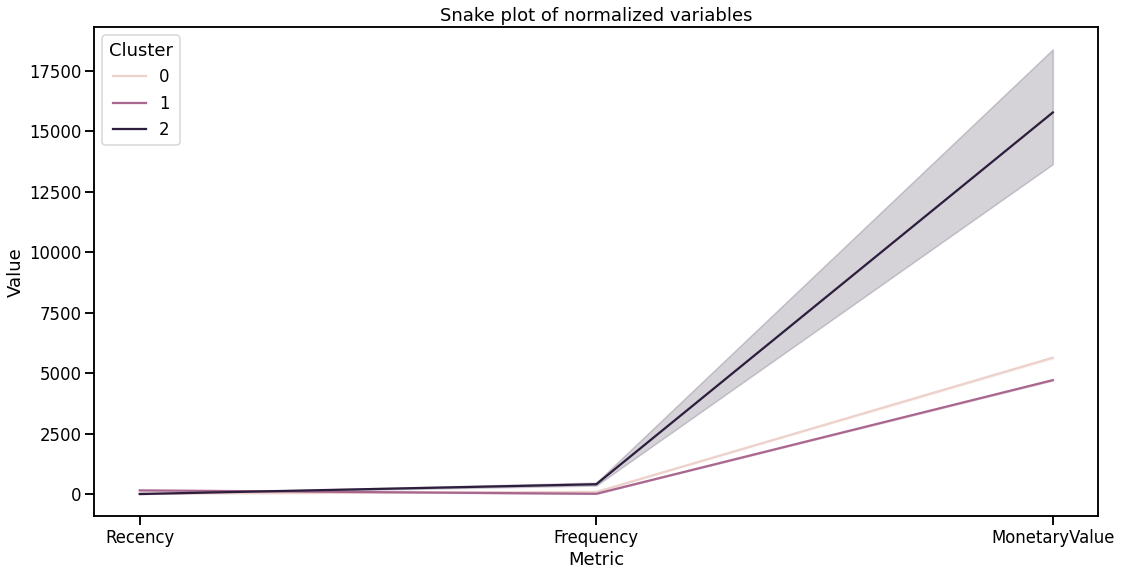

In [50]:
plt.figure(figsize = (18,9))
plt.title('Snake plot of normalized variables')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.lineplot(data=data_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

Calculate relative importance of each attribute::::::::::
Now we will calculate relative importance for RFM Values for each cluster.

In [51]:
cluster_avg = data_rfm_k3.groupby(['Cluster']).mean()
population_avg = data_rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.64,0.05,-0.09
1,0.78,-0.76,-0.24
2,-0.86,3.47,1.55


Heatmap

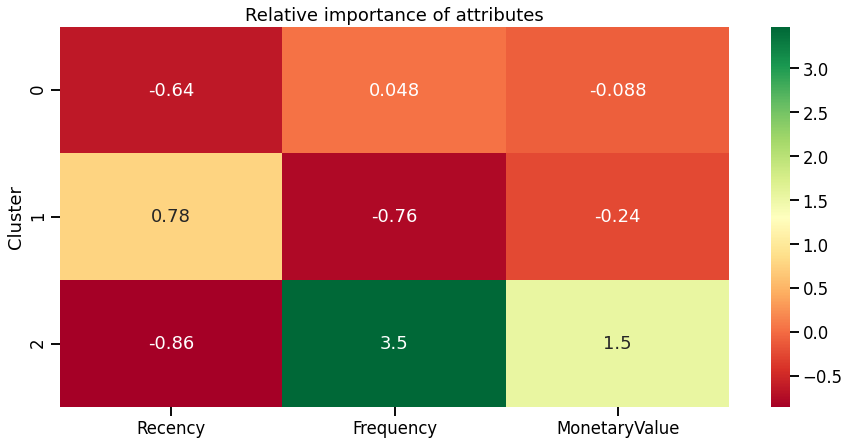

In [52]:
plt.figure(figsize=(15,7))
plt.title("Relative importance of attributes")
sns.heatmap(data=relative_imp,annot=True, fmt='.2g', cmap='RdYlGn')
plt.show()

In [53]:
relative_imp.style.background_gradient(cmap='RdYlGn',axis=1)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.635662,0.047795,-0.087886
1,0.775202,-0.763476,-0.237650
2,-0.857529,3.474845,1.549069


In [54]:
tenure_list = []
for i in list(data_rfm.index):
    tenure_list.append((df.InvoiceDate.max() - df[(df.CustomerID == i)]['InvoiceDate'].min()).days + 1)

In [55]:
data_rfmt = data_rfm.assign(Tenure = tenure_list)
data_rfmt.min()

Recency          1.0
Frequency        1.0
MonetaryValue    1.0
Tenure           1.0
dtype: float64

In [56]:
data_rfmt_log = np.log(data_rfmt)
scaler = StandardScaler()
scaler.fit(data_rfmt_log)
data_rfmt_normalized = scaler.transform(data_rfmt_log)

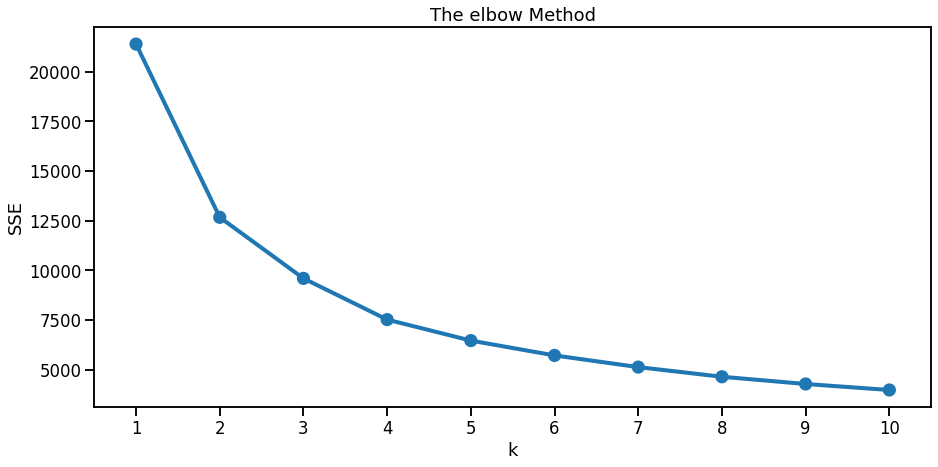

In [57]:
sse = {}
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=1).fit(data_rfmt_log)
  sse[k] = kmeans.inertia_
plt.figure(figsize=(15,7))
plt.title("The elbow Method")
plt.xlabel("k")
plt.ylabel("SSE")
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

3 or 4 = I will go with 4.

In [58]:
kmeans = KMeans(n_clusters=4,random_state=1)
kmeans.fit(data_rfmt_normalized)
cluster_labels = kmeans.labels_

In [59]:
data_rfmt_k4 = data_rfmt.assign(Cluster=cluster_labels)
grouped = data_rfmt_k4.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0          11.7     477.6       19058.2  341.8   293
1          35.0      35.7        4807.5   50.1   935
2         192.6      24.7        4748.0  257.9  1632
3          34.4     127.8        6099.3  277.3  1512